<a href="https://colab.research.google.com/github/malaya12/mockito/blob/master/Questions_Lab_on_Unsupervised_Learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [167]:
import pandas as pd
data_df = pd.read_csv("/content/drive/My Drive/Rohan Abhilasha/AIML/breast-cancer-wisconsin-data.csv")

Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows


In [168]:
data_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [169]:
# Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis

In [170]:
data_df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [171]:
data_df.shape

(699, 11)

In [172]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           699 non-null    int64 
 1   ClumpThickness               699 non-null    int64 
 2   Cell Size                    699 non-null    int64 
 3   Cell Shape                   699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Normal Nucleoli              699 non-null    int64 
 8   Bland Chromatin              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [173]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary. 

In [174]:
data_df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

Lets check for missing valus as well

In [175]:
data_df.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [176]:
#No mising value found in the column, only question mark in Bare Nuclei so we can tack it in each column and replace it

In [177]:
data_df['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [178]:
data_df[data_df["Bare Nuclei"] == '?']

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [179]:
#We see 16 values are having '?' which is bad data and we have to either delete or impute. Since data is large so we cn even remove.
# Since in value count on appeared for 402 times so we can replace it with one

In [180]:
data_df["Bare Nuclei"].replace("?", "1", inplace=True)

In [181]:
data_df["Bare Nuclei"].value_counts()

1     418
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [182]:
#Now remove the duplicate data

In [183]:
dups = data_df.duplicated()
print ("Number of duplicate value: ", dups.sum())

Number of duplicate value:  9


In [184]:
data_df[dups]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
208,1218860,1,1,1,1,1,1,3,1,1,2
253,1100524,6,10,10,2,8,10,7,3,3,4
254,1116116,9,10,10,1,10,8,3,3,1,4
258,1198641,3,1,1,1,2,1,3,1,1,2
272,320675,3,3,5,2,3,10,7,1,1,4
322,733639,3,1,1,1,2,1,3,1,1,2
338,704097,1,1,1,1,1,1,2,1,1,2
561,1321942,5,1,1,1,2,1,3,1,1,2
684,466906,1,1,1,1,2,1,1,1,1,2


In [185]:
data_df.drop_duplicates(subset=None, keep='first', inplace=True)

In [186]:
data_df.shape

(690, 11)

In [187]:
data_df['Bare Nuclei'] = data_df['Bare Nuclei'].astype('int64')
data_df.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

### **`Q4. Perform bi variate analysis including correlation, pairplots and state the inferences.`**


In [188]:
# Check for correlation of variable

In [189]:
data_df.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.059592,-0.043856,-0.042803,-0.066771,-0.048102,-0.091832,-0.059802,-0.054517,-0.036286,-0.080084
ClumpThickness,-0.059592,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,-0.043856,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,-0.042803,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,-0.066771,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,-0.048102,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,-0.091832,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,-0.059802,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,-0.054517,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,-0.036286,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947


In [190]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [191]:
#Let us check for pair plots

In [192]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

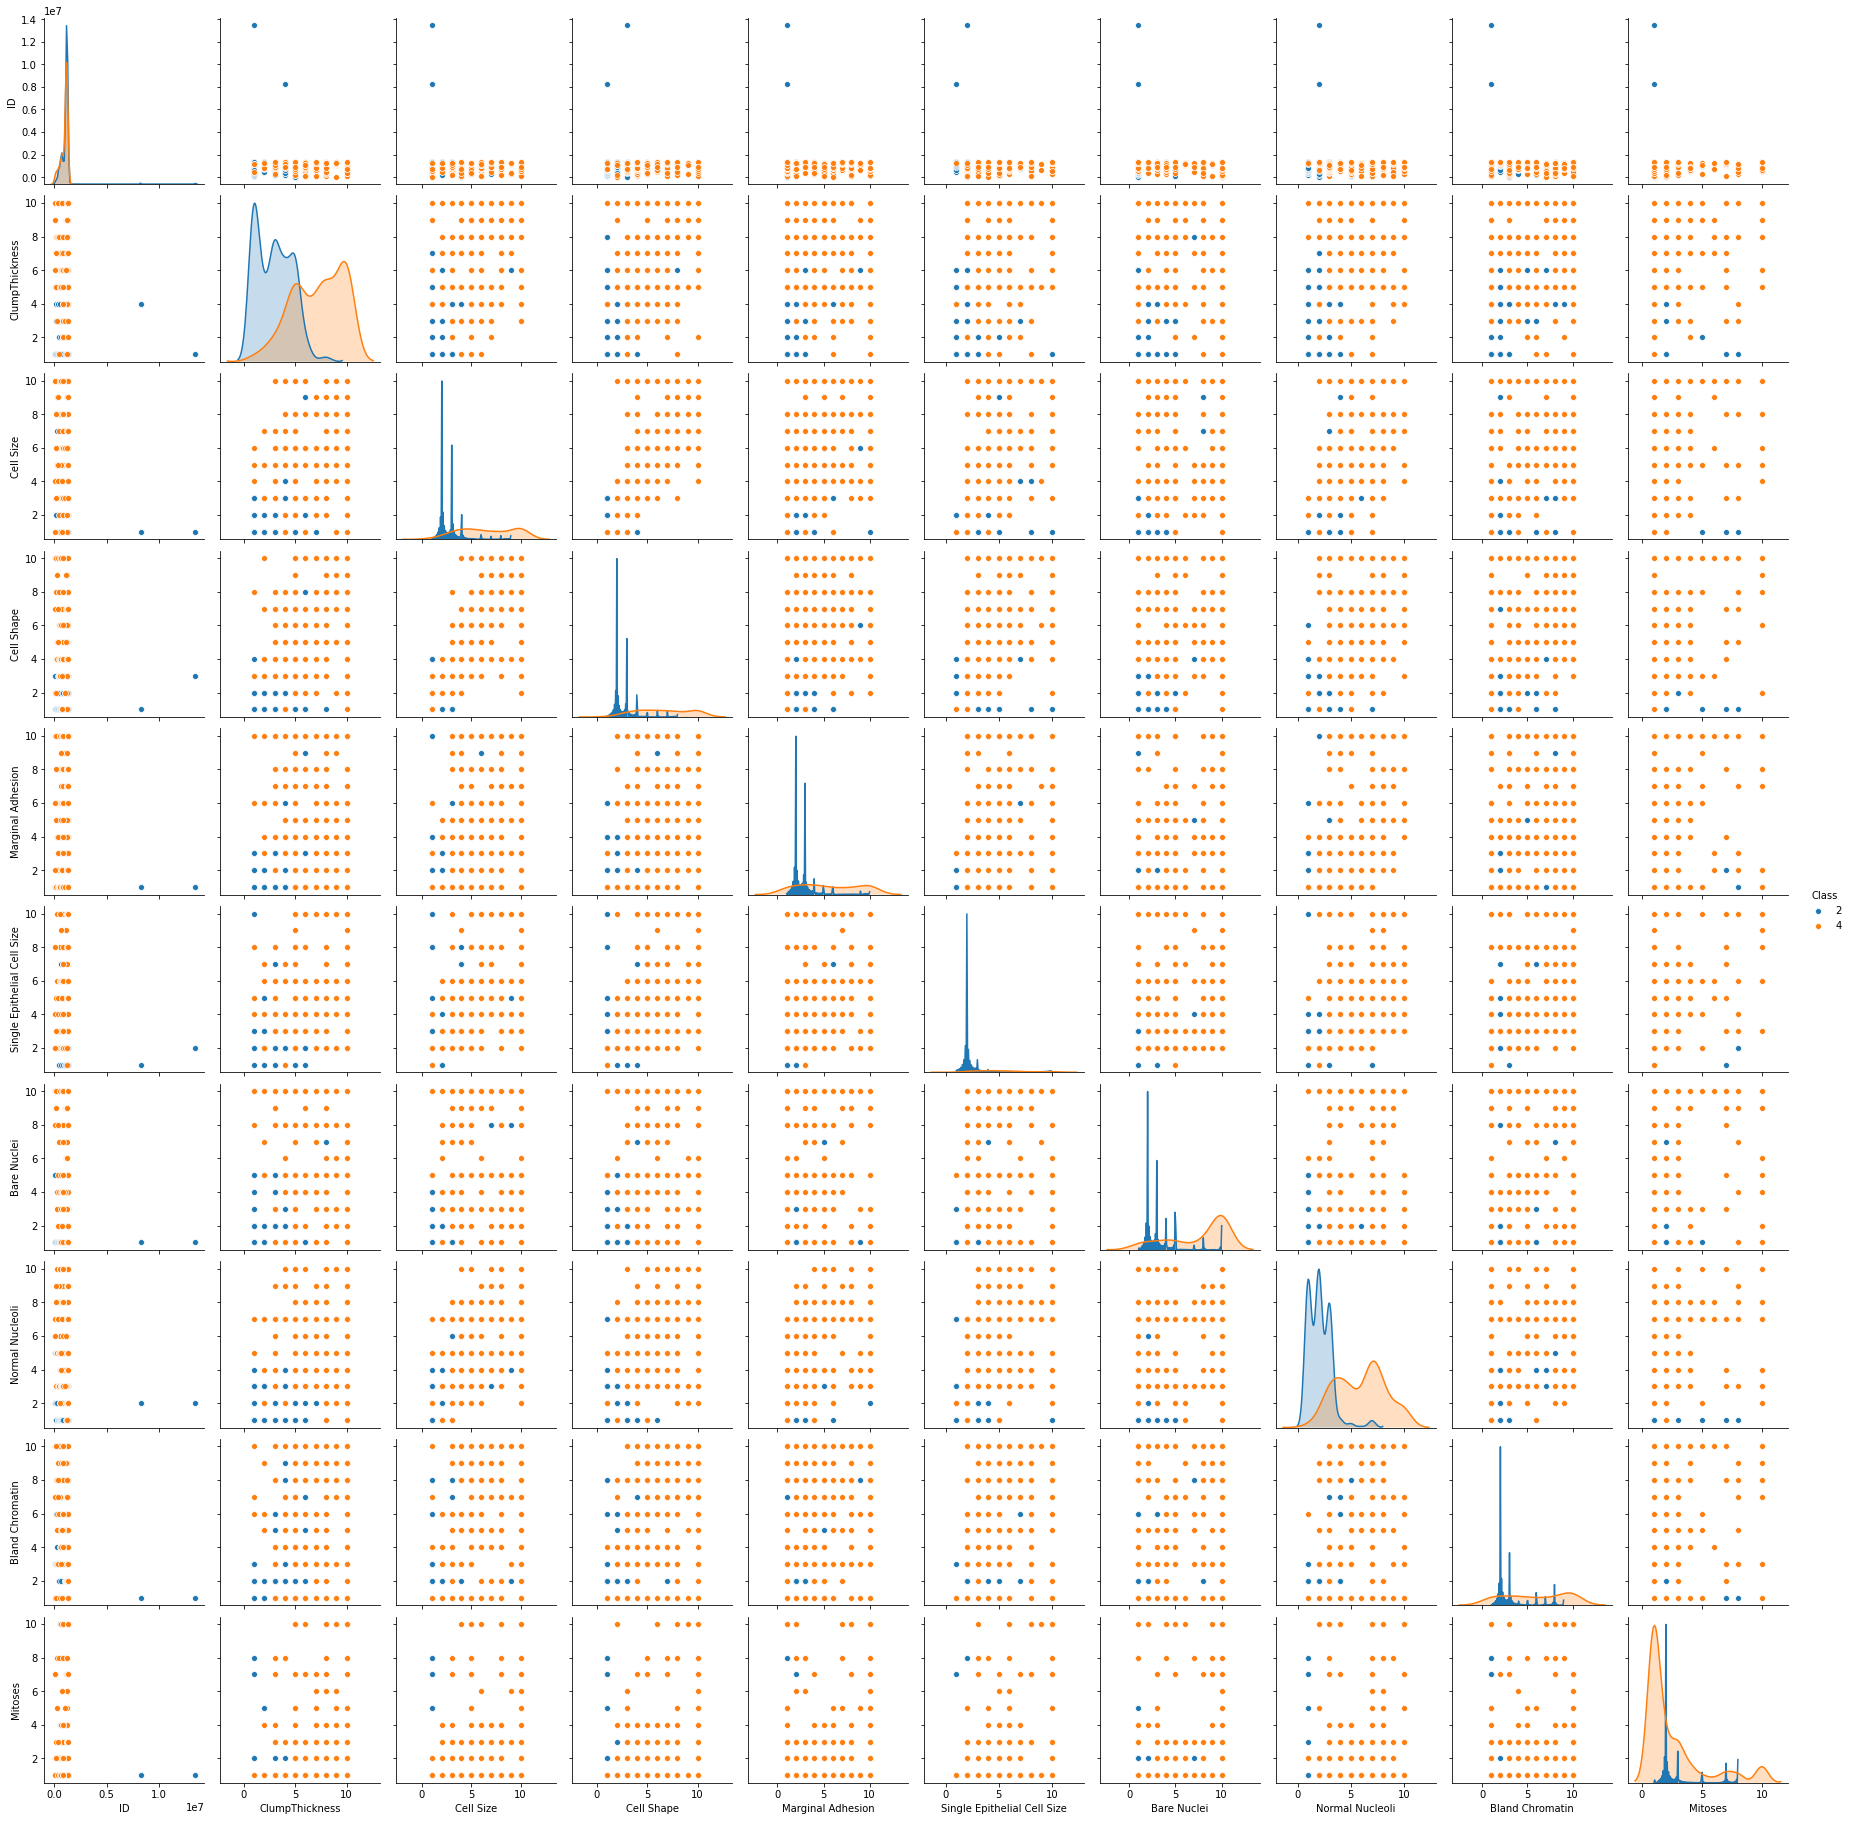

In [193]:
sns.pairplot(data_df, diag_kind='kde', hue='Class')

In [194]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

### **Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step**

In [195]:
data_df = data_df.drop(['ID'], axis=1)

data_df.head(10)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


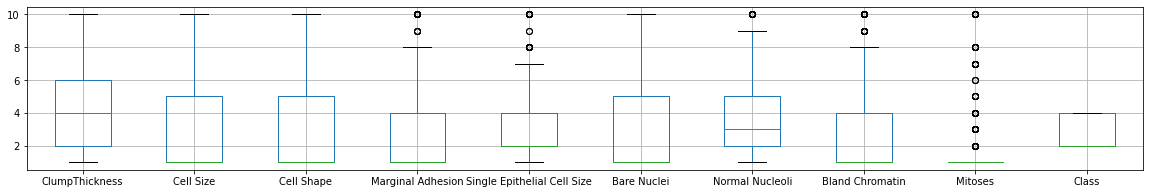

In [196]:
data_df.boxplot(figsize=(20,3))

In [197]:
# We could see most of the outliers and can remove them.

In [198]:
pd.crosstab(data_df['Marginal Adhesion'], data_df['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [199]:
data_df['Marginal Adhesion'] = np.where(data_df['Marginal Adhesion']>6, 6, data_df['Marginal Adhesion'])

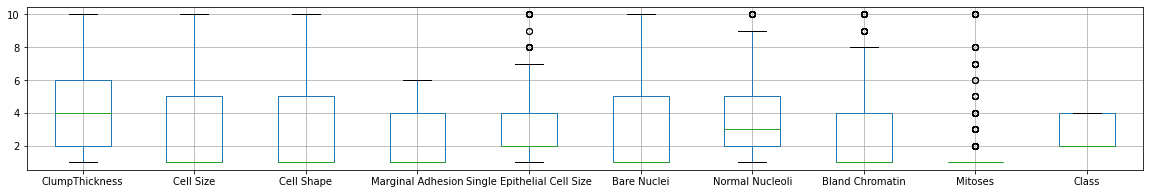

In [200]:
data_df.boxplot(figsize=(20,3))

In [201]:
pd.crosstab(data_df['Single Epithelial Cell Size'], data_df['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [202]:
data_df['Single Epithelial Cell Size'] = np.where(data_df['Single Epithelial Cell Size']>6, 6, data_df['Single Epithelial Cell Size'])

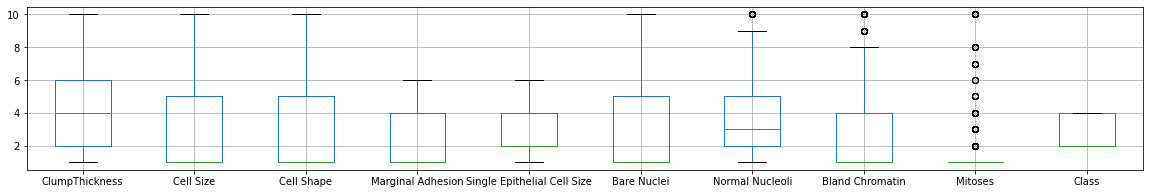

In [203]:
data_df.boxplot(figsize=(20,3))

In [204]:
pd.crosstab(data_df['Normal Nucleoli'], data_df['Class'])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,125,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


In [205]:
data_df['Normal Nucleoli'] = np.where(data_df['Normal Nucleoli'] > 7, 7, data_df['Normal Nucleoli'])

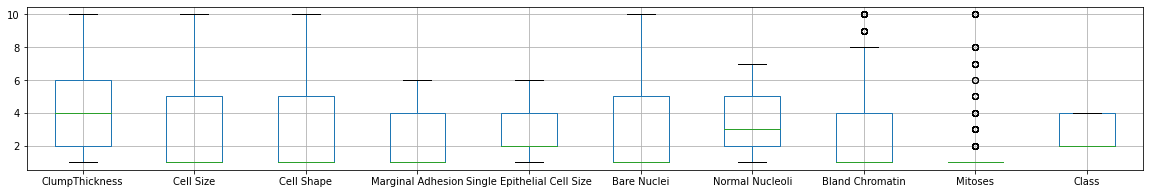

In [206]:
data_df.boxplot(figsize=(20,3))

In [207]:
pd.crosstab(data_df['Bland Chromatin'], data_df['Class'])

Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [208]:
data_df['Bland Chromatin'] = np.where(data_df['Bland Chromatin'] > 6, 6, data_df['Bland Chromatin'])

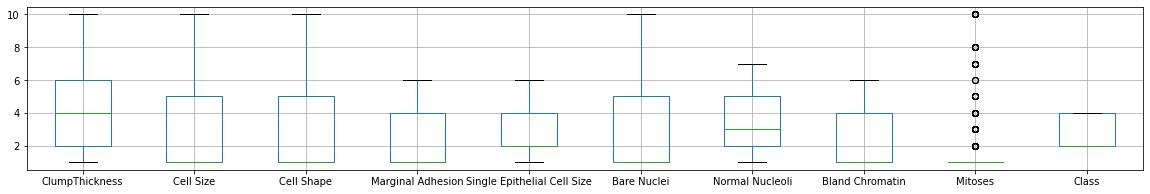

In [209]:
data_df.boxplot(figsize=(20,3))

In [210]:
pd.crosstab(data_df['Mitoses'], data_df['Class'])

Class,2,4
Mitoses,,
1,439,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [211]:
data_df['Mitoses'] = np.where(data_df['Mitoses'] > 3, 3, data_df['Mitoses'])

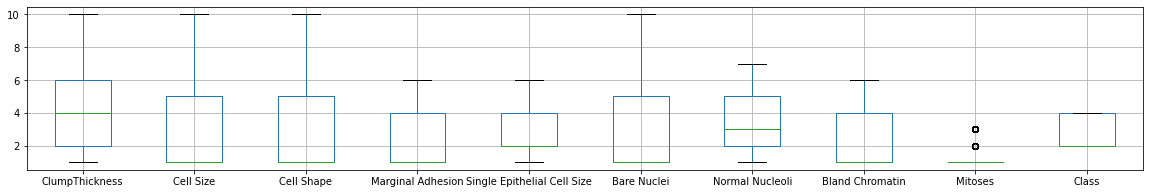

In [212]:
data_df.boxplot(figsize=(20,3))

In [213]:
data_new=data_df.drop(['Class'], axis=1)

In [214]:
data_new.head(10)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,6,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,6,1
4,4,1,1,3,2,1,3,1,1
5,8,10,10,6,6,10,7,6,1
6,1,1,1,1,2,10,3,1,1
7,2,1,2,1,2,1,3,1,1
8,2,1,1,1,2,1,1,1,3
9,4,2,1,1,2,1,2,1,1


In [215]:
data_new.shape

(690, 9)

In [216]:
#Standardized data with Z score 

In [217]:
from scipy.stats import zscore

In [218]:
data_new = data_new.apply(zscore)
data_new.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.202823,-0.701698,-0.745040,-0.717738,-0.606754,-0.686858,-0.131401,-0.673794,-0.438024
1,0.202823,0.285065,0.268920,1.339330,1.934431,1.803153,-0.131401,-0.181817,-0.438024
2,-0.507572,-0.701698,-0.745040,-0.717738,-0.606754,-0.410190,-0.131401,-0.673794,-0.438024
3,0.558020,1.600748,1.620866,-0.717738,0.028542,0.143146,-0.131401,1.786088,-0.438024
4,-0.152375,-0.701698,-0.745040,0.310796,-0.606754,-0.686858,-0.131401,-0.673794,-0.438024


# **Q6 Create a covariance matrix for identifying Principal components**

In [219]:
# PCA
# Step 1 - Create covariance matrix

In [220]:
cov_matrix = np.cov(data_new.T)
print("Covariance Matrix", cov_matrix)

Covariance Matrix [[1.00145138 0.64410677 0.65453792 0.52967571 0.56014292 0.59150555
  0.57632311 0.5573719  0.42745595]
 [0.64410677 1.00145138 0.9066632  0.73739949 0.78736392 0.68556472
  0.74749076 0.73254055 0.51098944]
 [0.65453792 0.9066632  1.00145138 0.71499206 0.75864187 0.70518656
  0.73047144 0.72736411 0.48167882]
 [0.52967571 0.73739949 0.71499206 1.00145138 0.68674237 0.70175121
  0.6931809  0.6562427  0.45304643]
 [0.56014292 0.78736392 0.75864187 0.68674237 1.00145138 0.64591131
  0.67167598 0.70333283 0.49711992]
 [0.59150555 0.68556472 0.70518656 0.70175121 0.64591131 1.00145138
  0.69379705 0.62721796 0.45258904]
 [0.57632311 0.74749076 0.73047144 0.6931809  0.67167598 0.69379705
  1.00145138 0.68956763 0.41318259]
 [0.5573719  0.73254055 0.72736411 0.6562427  0.70333283 0.62721796
  0.68956763 1.00145138 0.4868789 ]
 [0.42745595 0.51098944 0.48167882 0.45304643 0.49711992 0.45258904
  0.41318259 0.4868789  1.00145138]]


In [221]:
cov_matrix_error = np.cov(data_new)
cov_matrix_error.shape

(690, 690)

### **Q7 Identify eigen values and eigen vector**

In [222]:
# Step 2- Get eigen values and eigen vector

In [224]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors', eig_vecs)
print('Eigen values', eig_vals)

Eigen Vectors [[-0.29990877  0.02532633 -0.90458698  0.01009283  0.04011602 -0.02496126
  -0.16812883 -0.1942323  -0.15102311]
 [-0.371028   -0.07826688  0.03615884  0.73585974  0.29013384  0.27700055
   0.29553659  0.00255389  0.25526487]
 [-0.36727544 -0.11650277 -0.02943677 -0.66233934  0.26173086  0.26192054
   0.46290204  0.09908916  0.22532989]
 [-0.33820232 -0.13252818  0.28370519 -0.05299714 -0.37433331  0.28321095
  -0.03171908 -0.70498634 -0.2577061 ]
 [-0.34586466 -0.01060724  0.21664633 -0.07240532  0.33116552  0.30291277
  -0.66941156  0.3320389  -0.2613399 ]
 [-0.333385   -0.11428531 -0.04605473  0.08435088 -0.67484899 -0.0023807
   0.18226948  0.58009444 -0.20346657]
 [-0.3411041  -0.23601998  0.082477   -0.05380154 -0.1675929  -0.44173582
  -0.36926402 -0.07274827  0.67333451]
 [-0.33804873 -0.01023424  0.19059208  0.02486003  0.31543401 -0.69755129
   0.22666287 -0.05206477 -0.45663086]
 [-0.24844318  0.94504626  0.08291743 -0.03219093 -0.11360828 -0.01914864
   0.0063

### **Q8 Find variance and cumulative variance by each eigen vector**

In [225]:
tot = sum(eig_vals)
var_exp = [(i/tot) *  100 for i in sorted(eig_vals, reverse = True)]
var_exp

[68.10690113479974,
 7.532406231449151,
 5.743663405164425,
 4.7227261530745634,
 3.746895301526102,
 3.2209950681685404,
 3.107670561554323,
 2.8206933212456144,
 0.9980488230175425]

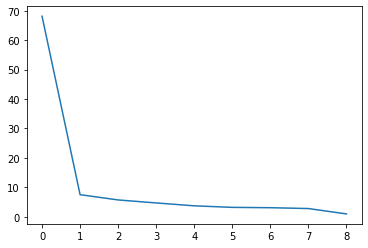

In [226]:
plt.plot(var_exp)

In [227]:
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 68.10690113  75.63930737  81.38297077  86.10569692  89.85259223
  93.07358729  96.18125786  99.00195118 100.        ]


<BarContainer object of 9 artists>

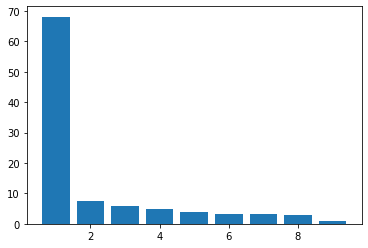

In [228]:
plt.bar(range(1,eig_vals.size + 1), var_exp, align ='center', label = 'Individual variance explained')

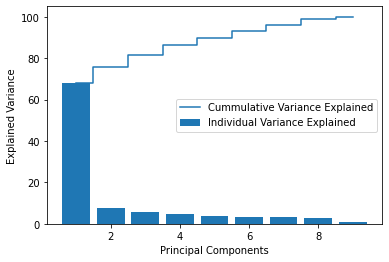

In [229]:
plt.bar(range(1, eig_vals.size +1), var_exp, align = 'center', label = 'Individual Variance Explained')
plt.step(range(1, eig_vals.size +1), cum_var_exp, where = 'mid', label = 'Cummulative Variance Explained')
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.show()

**Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed**

In [231]:
from sklearn.decomposition import PCA

In [232]:
pca = PCA(n_components = 7) # 95% of variance is captured using first7 PCs
data_reduced = pca.fit_transform(data_new)
data_reduced.transpose()

array([[-1.53615998,  1.77341453, -1.65697669, ...,  3.9397629 ,
         2.32971054,  2.73124468],
       [-0.04913431, -0.8336753 , -0.09874508, ...,  0.07199281,
        -1.21460091, -1.3897963 ],
       [-0.66593292,  0.45312887, -0.03606089, ...,  0.91731031,
         0.85143017,  0.91479111],
       ...,
       [-0.24356669,  1.29857886, -0.226493  , ..., -0.15026113,
        -1.08154121,  0.11929411],
       [-0.25805548,  1.18710093, -0.30904885, ..., -1.03968822,
        -0.70297977, -0.94974911],
       [-0.15285929,  0.7625279 ,  0.14561584, ...,  0.29073247,
        -0.57196966, -0.44487335]])

In [233]:
pca.components_

array([[ 0.29990877,  0.371028  ,  0.36727544,  0.33820232,  0.34586466,
         0.333385  ,  0.3411041 ,  0.33804873,  0.24844318],
       [ 0.02532633, -0.07826688, -0.11650277, -0.13252818, -0.01060724,
        -0.11428531, -0.23601998, -0.01023424,  0.94504626],
       [-0.90458698,  0.03615884, -0.02943677,  0.28370519,  0.21664633,
        -0.04605473,  0.082477  ,  0.19059208,  0.08291743],
       [ 0.04011602,  0.29013384,  0.26173086, -0.37433331,  0.33116552,
        -0.67484899, -0.1675929 ,  0.31543401, -0.11360828],
       [-0.02496126,  0.27700055,  0.26192054,  0.28321095,  0.30291277,
        -0.0023807 , -0.44173582, -0.69755129, -0.01914864],
       [ 0.15102311, -0.25526487, -0.22532989,  0.2577061 ,  0.2613399 ,
         0.20346657, -0.67333451,  0.45663086, -0.15250436],
       [-0.1942323 ,  0.00255389,  0.09908916, -0.70498634,  0.3320389 ,
         0.58009444, -0.07274827, -0.05206477, -0.02608541]])

**Q10 Find correlation between components and features**

In [234]:
list(data_new)

['ClumpThickness',
 'Cell Size',
 'Cell Shape',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Normal Nucleoli',
 'Bland Chromatin',
 'Mitoses']

In [235]:
df_comp_feat = pd.DataFrame(pca.components_, columns = list(data_new))
df_comp_feat

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.299909,0.371028,0.367275,0.338202,0.345865,0.333385,0.341104,0.338049,0.248443
1,0.025326,-0.078267,-0.116503,-0.132528,-0.010607,-0.114285,-0.236020,-0.010234,0.945046
2,-0.904587,0.036159,-0.029437,0.283705,0.216646,-0.046055,0.082477,0.190592,0.082917
3,0.040116,0.290134,0.261731,-0.374333,0.331166,-0.674849,-0.167593,0.315434,-0.113608
4,-0.024961,0.277001,0.261921,0.283211,0.302913,-0.002381,-0.441736,-0.697551,-0.019149
5,0.151023,-0.255265,-0.225330,0.257706,0.261340,0.203467,-0.673335,0.456631,-0.152504
6,-0.194232,0.002554,0.099089,-0.704986,0.332039,0.580094,-0.072748,-0.052065,-0.026085


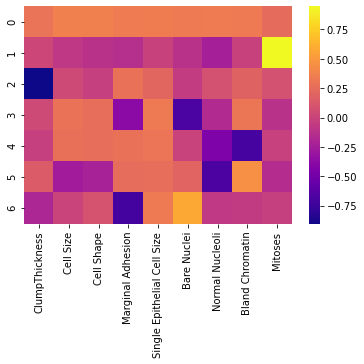

In [239]:
sns.heatmap(df_comp_feat, cmap="plasma")